## Observations and Insights 

In [458]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_and_mouse_original=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
study_and_mouse_original



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [459]:
# Checking the number of mice.
number_of_mice = study_and_mouse_original['Mouse ID'].nunique()
number_of_mice


249

In [460]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
### i changed this to output the mouse id I need for the following cell, i might need to change it so it what they're requesting

bad_mice_id= study_and_mouse_original[study_and_mouse_original.duplicated()].reset_index(drop=True).at[0,'Mouse ID']
bad_mice_id



'g989'

In [461]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# creates a dataframe of the rows that need to be dropped
mice_to_drop=study_and_mouse_original.loc[study_and_mouse_original["Mouse ID"]==bad_mice_id,:]
mice_to_drop
#drops rows based on index
study_and_mouse_working=study_and_mouse_original.drop(labels=mice_to_drop.index,axis=0)
study_and_mouse_working



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [462]:
# Checking the number of mice in the clean DataFrame.
study_and_mouse_working["Mouse ID"].nunique()


248

## Summary Statistics

In [463]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# # mean, median, variance, standard deviation, and SEM of the tumor volume. 
# # Assemble the resulting series into a single summary dataframe.

sm_gbo=study_and_mouse_working.groupby('Drug Regimen')

sm_stats_df=pd.DataFrame({"Tumor Volume Mean":sm_gbo["Tumor Volume (mm3)"].mean(),
        "Tumor Volume Median":sm_gbo["Tumor Volume (mm3)"].median(),
        "Tumor Volume Variance":sm_gbo["Tumor Volume (mm3)"].var(),
        "Tumor Volume StDev":sm_gbo["Tumor Volume (mm3)"].std(),
        "Tumor Volume SEM":sm_gbo["Tumor Volume (mm3)"].sem()
})

sm_stats_df




,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [464]:
# # Using the aggregation method, produce the same summary statistics in a single line
stat_gbo_agg=(sm_gbo["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']))
stat_gbo_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

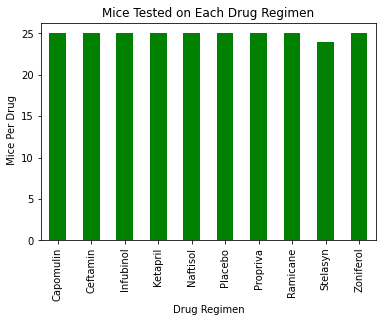

In [465]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#preping the data
mice_per_drug=study_and_mouse_original.groupby('Drug Regimen')[['Mouse ID']].nunique()
mice_per_drug = mice_per_drug.rename(columns={'Mouse ID':'Mice Per Drug'})

#plotting the data
mice_per_drug_p_plot=mice_per_drug.plot(kind="bar",title='Mice Tested on Each Drug Regimen',legend=False,color="green")
mice_per_drug_p_plot.set_ylabel(' Mice Per Drug')
mice_per_drug_p_plot

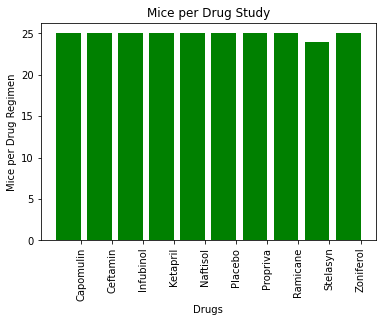

In [466]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#
#prepping the data
x_range = np.arange(len(mice_per_drug["Mice Per Drug"]))
plt.bar(mice_per_drug.index,mice_per_drug["Mice Per Drug"],color="green")
tick_locations = [value+0.4 for value in x_range]

#plotting the data
plt.xticks(tick_locations,mice_per_drug.index,rotation='vertical')
plt.xlabel('Drugs')
plt.ylabel('Mice per Drug Regimen')
plt.title("Mice per Drug Study")
plt.show()



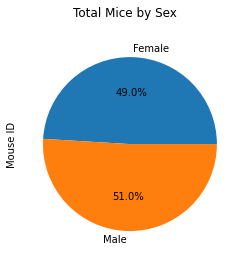

In [467]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#need to figure out how to remove "Mouse ID" from the graph and add the percentage
sex_gbo=study_and_mouse_working.groupby("Sex")[['Mouse ID']].count()
sex_pie=sex_gbo.plot(kind="pie",subplots="True",title=("Total Mice by Sex"),legend=False,autopct="%1.1f%%")


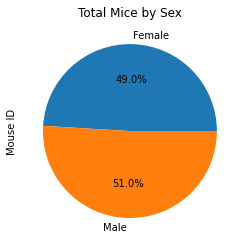

In [468]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_gbo=study_and_mouse_working.groupby("Sex")[['Mouse ID']].count()

plt.pie(gender_gbo,labels=gender_gbo.index,autopct="%1.1f%%")
plt.title('Total Mice by Sex')
plt.ylabel('Mouse ID')
plt.show()


## Quartiles, Outliers and Boxplots

In [469]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#creates a dataframe of all entries related to the 4 requested drugs
top_drugs_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
top_drugs_df =study_and_mouse_working.loc[study_and_mouse_working['Drug Regimen'].isin(top_drugs_list)]

#finds the max time point for each drug and mouse
top_time=pd.DataFrame(top_drugs_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max())

#meges in the orginal dataframe on the 
final_tumor_volumes = pd.merge(top_time,study_and_mouse_working[['Timepoint','Mouse ID','Tumor Volume (mm3)','Drug Regimen']], on=['Timepoint','Mouse ID','Drug Regimen'])
final_tumor_volumes



,Timepoint,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,45,b128,Capomulin,38.982878
1,45,b742,Capomulin,38.939633
2,20,f966,Capomulin,30.485985
3,45,g288,Capomulin,37.074024
4,45,g316,Capomulin,40.159220
...,...,...,...,...
95,45,s508,Ramicane,30.276232
96,45,u196,Ramicane,40.667713
97,5,w678,Ramicane,43.166373
98,15,y449,Ramicane,44.183451


In [470]:
# Put treatments into a list for for loop (and later for plot labels)

top_drugs_list

# Create empty list to fill with tumor vol data (for plotting)
## I'm using a dictionary instead because I'm a rebel \m/
tumor_vol_stats={}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
## Calculates the IQR and fills a dictionary with the rersults #I could make a list of stat names to loop through making this a little more slim
for regimen in top_drugs_list:
    current_reg=final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen']==regimen,:]
    quarts=current_reg.quantile([.25,.5,.75])
    lowerq=quarts.at[.25,'Tumor Volume (mm3)']
    median=quarts.at[.50,'Tumor Volume (mm3)']
    upperq=quarts.at[.75,'Tumor Volume (mm3)']
    iqr = upperq-lowerq 
    lo_bo = lowerq-(1.5*iqr)
    hi_bo = upperq+(1.5*iqr)
    tumor_vol_stats[regimen]={
        'IQR':iqr,
        'Lower Quartile':lowerq,
        'Median':median,
        'Upper Quartile':upperq,
        'Lower Bound':lo_bo,
        'Upper Buond':hi_bo
        }
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
tumor_vol_stats


{'Capomulin': {'IQR': 7.781863460000004,
  'Lower Quartile': 32.37735684,
  'Median': 38.125164399999996,
  'Upper Quartile': 40.1592203,
  'Lower Bound': 20.70456164999999,
  'Upper Buond': 51.83201549},
 'Ramicane': {'IQR': 9.098536719999998,
  'Lower Quartile': 31.56046955,
  'Median': 36.56165229,
  'Upper Quartile': 40.65900627,
  'Lower Bound': 17.912664470000003,
  'Upper Buond': 54.30681135},
 'Infubinol': {'IQR': 11.477135160000003,
  'Lower Quartile': 54.04860769,
  'Median': 60.16518046,
  'Upper Quartile': 65.52574285,
  'Lower Bound': 36.83290494999999,
  'Upper Buond': 82.74144559000001},
 'Ceftamin': {'IQR': 15.577752179999997,
  'Lower Quartile': 48.72207785,
  'Median': 59.85195552,
  'Upper Quartile': 64.29983003,
  'Lower Bound': 25.355449580000002,
  'Upper Buond': 87.66645829999999}}

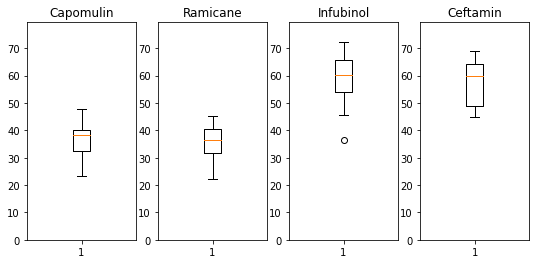

In [471]:
# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#pass a drug name through this function and it will return the volumne data to plot for that drug
def get_plot_data(druggo):
    box_plot_data=final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen']==druggo,['Tumor Volume (mm3)']]
    box_plot_data=box_plot_data['Tumor Volume (mm3)'].tolist()
    return box_plot_data

#setting the top
y_box_max=final_tumor_volumes['Tumor Volume (mm3)'].max()+(final_tumor_volumes['Tumor Volume (mm3)'].max()*.1)
#sets the frame plot for the 4 sub plots
plt.figure(figsize=(9, 4))

subplots = [141,142,143,144]
#creates the 4 subplots to graph, one for each drug
for ploto in subplots:
    xo=subplots.index(ploto)
    plt.subplot(ploto)
    plt.title(top_drugs_list[xo])
    plt.boxplot(get_plot_data(top_drugs_list[xo])) 
    plt.ylim((0,y_box_max))
plt.show()


## Line and Scatter Plots

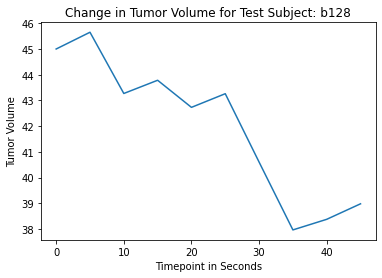

In [472]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse ='b128'

ln_pt_data=study_and_mouse_working.loc[study_and_mouse_working['Mouse ID']==cap_mouse,['Timepoint','Tumor Volume (mm3)']].reset_index(drop=True)
plt.xlabel("Timepoint in Seconds")
plt.ylabel("Tumor Volume")
plt.title("Change in Tumor Volume for Test Subject: "+cap_mouse)
plt.plot(ln_pt_data["Timepoint"],ln_pt_data['Tumor Volume (mm3)'])
plt.show()



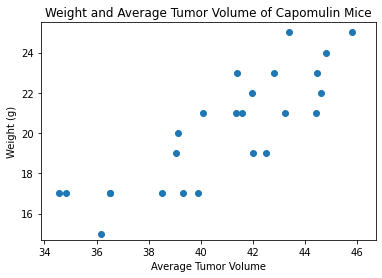

In [473]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


##get all the data for the capomulin regimen
capo_scat_data=study_and_mouse_working.loc[study_and_mouse_working['Drug Regimen']=='Capomulin',['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)','Weight (g)']]

capo_scat_data
#calculates the average tumor volumne for each 
cap_scat_avg_vol=pd.DataFrame(capo_scat_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
cap_scat_avg_vol=cap_scat_avg_vol.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume'})

#merges the average volumne data frame with the orginal mouse dataframe to pull in the weight
scat_weight_by_avg_vol=pd.merge(cap_scat_avg_vol,mouse_metadata[['Mouse ID','Weight (g)']],on='Mouse ID')

#sets the values for each axis
scat_x=scat_weight_by_avg_vol['Average Tumor Volume']
scat_y=scat_weight_by_avg_vol['Weight (g)']

#linear regression calc
scat_slope,scat_int,scat_r,scat_p,scat_std=st.linregress(scat_x,scat_y)
scat_fit_line=scat_slope*scat_x+scat_int

## these definitions(scatter_funct and regression_line_funct) have redundant code, i tried to include one function within...
##.... the definition of another to reduce redundancy but it didn't work :(
## if i can imbed functions within each other, i don't think I'll need these as defined functions
#creates scatter plot 
def scatter_funct():
    plt.scatter(scat_x,scat_y)
    plt.xlabel('Average Tumor Volume')
    plt.ylabel('Weight (g)')
    plt.title("Weight and Average Tumor Volume of Capomulin Mice")
    plt.xlim(min(scat_x)-(min(scat_x)*.02),max(scat_x)+(max(scat_x)*.02))
    plt.ylim(min(scat_y)-(min(scat_y)*.02),max(scat_y)+(max(scat_y)*.02))
    return

# i dont think i need this
def regression_line_funct():
    plt.scatter(scat_x,scat_y,)
    plt.plot(scat_x,scat_fit_line,color="black")
    plt.xlabel('Average Tumor Volume')
    plt.ylabel('Weight (g)')
    plt.title("Weight and Average Tumor Volume of Capomulin Mice")
    plt.xlim(min(scat_x)-(min(scat_x)*.02),max(scat_x)+(max(scat_x)*.02))
    plt.ylim(min(scat_y)-(min(scat_y)*.02),max(scat_y)+(max(scat_y)*.02))
    return


scatter_funct()
plt.show()


## Correlation and Regression

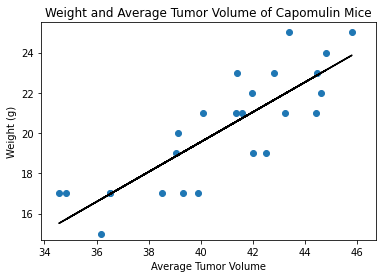

The R Value of Weight and Average Tumor Volume is 0.8419, which means the correlation is High
The P Value is 1.3225722434712642e-07
The Standard deviation is 0.09924763572688564
The Line equation is y=0.74x+(-10.15)


In [474]:
# Calculate the correlation coefficient and linear regression model 
"Weight and Average Tumor Volume"
#### 
#creates scatter plot and regression line
regression_line_funct()
plt.show()

labels_correlated = ['High','Mid','Low']

if scat_r > .75:
    correlation = labels_correlated[0]
elif .75>scat_r>.25:
    correlation = labels_correlated[1]
elif scat_r<.25:
    correlation = labels_correlated[1]

to_write=f'The R Value of Weight and Average Tumor Volume is {round(scat_r,4)}, which means the correlation is {correlation}\nThe P Value is {scat_p}\nThe Standard deviation is {scat_std}\nThe Line equation is y={round(scat_slope,2)}x+({round(scat_int,2)})'

print(to_write)

# print(round(scat_r,4))



# for mouse weight and average tumor volume for the Capomulin regimen
